In [1]:
# import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
# from nsfw_detector import predict
from tensorflow import keras
from keras.optimizers import SGD
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, AveragePooling2D
from keras import initializers, regularizers

In [26]:
import cv2
from keras.preprocessing import image

In [2]:
import constants
import callbacks
import generators

In [3]:
height = constants.SIZES['basic']
width = height
weights_file = "weights.best_inception" + str(height) + ".hdf5"
print(height)

299


In [4]:
model_keras = keras.models.load_model('./MODELOS/nsfw.299x299.h5')

In [5]:
def checkNum(s):
    return any(map(str.isdigit, s))

In [6]:
for i, layer in enumerate(model_keras.layers):
    # print(f'Layer atual: {layer.name}')

    if checkNum(str(layer.name)[-2:-1]):
        layer._name = str(layer.name)[:-3] + '_' + str(i)
        # print(str(layer.name)[:-3] + '_' + str(i))
    else:
        layer._name = str(layer.name)[:-2] + '_' + str(i)
        # print(str(layer.name)[:-2] + '_' + str(i))
    

In [7]:
# Let's construct that top layer replacement
x = model_keras.layers[-2].output
x - keras.layers.Dropout(0.4)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None), kernel_regularizer=keras.regularizers.l2(.0005))(x)
x = keras.layers.Dropout(0.5)(x)
# Essential to have another layer for better accuracy
x = keras.layers.Dense(128,activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None))(x)
x = keras.layers.Dropout(0.25)(x)
predictions = keras.layers.Dense(2,  kernel_initializer="glorot_uniform", activation='softmax')(x)

In [8]:
model = keras.models.Model(inputs = model_keras.input, outputs=predictions)


In [9]:
opt = SGD(momentum=.9)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [10]:
train_generator, validation_generator = generators.create_generators(height, width)

Found 55000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [11]:
callbacks_list = callbacks.make_callbacks(weights_file)

In [13]:
history = model.fit(
    train_generator,
    callbacks=callbacks_list,
    epochs=constants.TOTAL_EPOCHS,
    steps_per_epoch=constants.STEPS_PER_EPOCH,
    shuffle=True,
    workers=4,
    use_multiprocessing=False,
    validation_data=validation_generator,
    validation_steps=constants.VALIDATION_STEPS
)

Epoch 1/50
  1/100 [..............................] - ETA: 0s - loss: 1.1544 - accuracy: 0.4688WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
100/100 [==============================] - 68s 677ms/step - loss: 1.1362 - accuracy: 0.4959 - val_loss: 1.0186 - val_accuracy: 0.4762
Epoch 2/50
100/100 [==============================] - 67s 668ms/step - loss: 1.1360 - accuracy: 0.4787 - val_loss: 1.0059 - val_accuracy: 0.4825
Epoch 3/50
100/100 [==============================] - 69s 693ms/step - loss: 1.1290 - accuracy: 0.4922 - val_loss: 0.9978 - val_accuracy: 0.4938
Epoch 4/50
100/100 [==============================] - 71s 709ms/step - loss: 1.0966 - accuracy: 0.5047 - val_loss: 0.9894 - val_accuracy: 0.4988
Epoch 5/50
100/100 [==============================] - 

In [15]:
# model.save("nude_model." + str(width) + "x" + str(height) + ".h5")
model.save_weights("nude_weights." + str(width) + "x" + str(height) + ".h5")

model_json = model.to_json()
json_name = ("nude_weights." + str(width) + "x" + str(height) + ".json")
with open(json_name, "w") as json_file:
    json_file.write(model_json)

In [34]:
model_json = model.to_json()
json_name = ("nude_weights_299.json")
with open("nude_weights_299.json", "w") as json_file:
    json_file.write(model_json)

In [2]:
model = predict.load_model('./MODELOS/nsfw_mobilenet2.224x224.h5')
# model = predict.load_model('./MODELOS/nsfw.299x299.h5')
results = {}

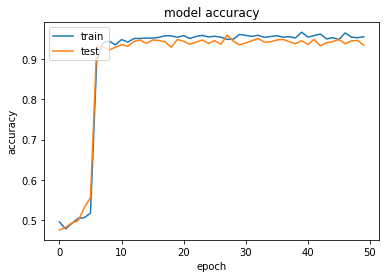

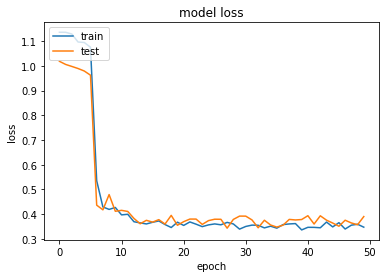

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# IMAGENS: NORMAIS

In [3]:
path = '/mnt/c/Users/guilo/mba-tcc/data/training/safe/*'
files = glob.glob(path)
len(files)

196283

In [4]:
path = '/mnt/c/Users/guilo/mba-tcc/data/testing/safe/*'
files = glob.glob(path)
len(files)

4050

In [5]:
path = '/mnt/c/Users/guilo/mba-tcc/data/training/nude/*'
files = glob.glob(path)
len(files)

430512

In [6]:
path = '/mnt/c/Users/guilo/mba-tcc/data/testing/nude/*'
files = glob.glob(path)
len(files)

3879

In [7]:
path = '/mnt/c/Users/guilo/mba-tcc/data/training/sexy/*'
files = glob.glob(path)
len(files)

38005

In [20]:
path = '/mnt/c/Users/guilo/mba-tcc/data/testing/sexy/*'
files = glob.glob(path)
len(files)

3500

In [21]:

path = r'C:\Users\guilo\mba-tcc\data\test\safest\*.jpg'
files = glob.glob(path)
imagem = np.random.choice(files)
# arquivo = imagem.replace('/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/safe/', '').replace('.jpg', '')
imagem



'C:\\Users\\guilo\\mba-tcc\\data\\test\\safest\\safest_3426.jpg'

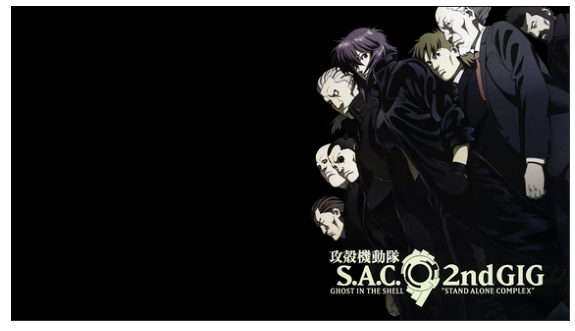

In [23]:
original_image = cv2.cvtColor(cv2.imread(imagem),cv2.COLOR_BGR2RGB)

figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(original_image)
# plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
cv2.imread(imagem).shape

(320, 569, 3)

In [31]:
def predict_single_image(image_path):
    
    image_data = image.load_img(image_path, target_size=(height, width))
    image_array = image.img_to_array(image_data)
    image_array /= 255

    plt.imshow(image_array);
    plt.axis('off');

    x_train = []
    x_train.append(image_array)
    x_test = np.array(x_train)

    predictions = model.predict(x_test)
    print(f'Not Safe: {round(predictions[0][0]*100, 2)}%')
    print(f'Safe: {round(predictions[0][1]*100, 2)}%')

Not Safe: 0.23%
Safe: 99.77%


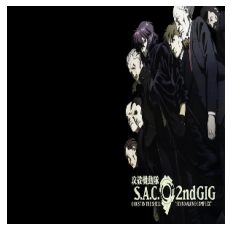

In [33]:
predict_single_image(r'C:\\Users\\guilo\\mba-tcc\\data\\test\\safest\\safest_3426.jpg')

In [27]:
    image_data = image.load_img(imagem, target_size=(299, 299))

    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)
    image_array /= 255

In [28]:
model.predict(np.array(image_array))

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 299, 3]


In [5]:
safe = predict.classify(model, imagem)
results[arquivo] = safe[imagem]
safe

NameError: name 'model' is not defined

# IMAGENS: SEXY

In [6]:
path = '/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/sexy/*.jpg'
files = glob.glob(path)
imagem = np.random.choice(files)
arquivo = imagem.replace('/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/sexy/', '').replace('.jpg', '')
imagem

'/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/sexy/BC546DD0-82EB-4C98-8AD4-C186A660FBD0.jpg'

In [7]:
# original_image = cv2.cvtColor(cv2.imread(imagem),cv2.COLOR_BGR2RGB)

# figure_size = 10
# plt.figure(figsize=(figure_size,figure_size))
# plt.imshow(original_image)
# plt.title('Imagem Original')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [8]:
sexy = predict.classify(model, imagem)
results[arquivo] = sexy[imagem]
sexy

/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/sexy/BC546DD0-82EB-4C98-8AD4-C186A660FBD0.jpg size: (224, 224)


{'/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/sexy/BC546DD0-82EB-4C98-8AD4-C186A660FBD0.jpg': {'drawings': 0.00221548555418849,
  'hentai': 0.011120972223579884,
  'neutral': 0.2431403249502182,
  'porn': 0.6058701872825623,
  'sexy': 0.13765303790569305}}

# IMAGENS: NUDE

In [9]:
path = '/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/*.jpg'
files = glob.glob(path)
imagem = np.random.choice(files)
arquivo = imagem.replace('/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/', '').replace('.jpg', '')
imagem

'/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/BF1FB549-FC45-41D0-A805-F72C1735125E.jpg'

In [10]:
# original_image = cv2.cvtColor(cv2.imread(imagem),cv2.COLOR_BGR2RGB)

# figure_size = 10
# plt.figure(figsize=(figure_size,figure_size))
# plt.imshow(original_image)
# plt.title('Imagem Original')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [11]:
nude = predict.classify(model, imagem)
results[arquivo] = nude[imagem]
nude

/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/BF1FB549-FC45-41D0-A805-F72C1735125E.jpg size: (224, 224)


{'/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/BF1FB549-FC45-41D0-A805-F72C1735125E.jpg': {'drawings': 4.4722142655828634e-11,
  'hentai': 0.00020623124146368355,
  'neutral': 5.463914021675009e-06,
  'porn': 0.9996592998504639,
  'sexy': 0.0001290148647967726}}

In [12]:
results

{'335474F7-4F47-457B-B11F-814A59794686': {'drawings': 0.00023175872047431767,
  'hentai': 5.1789153076242656e-05,
  'neutral': 0.9996912479400635,
  'porn': 2.426436185487546e-05,
  'sexy': 9.476454465584538e-07},
 'BC546DD0-82EB-4C98-8AD4-C186A660FBD0': {'drawings': 0.00221548555418849,
  'hentai': 0.011120972223579884,
  'neutral': 0.2431403249502182,
  'porn': 0.6058701872825623,
  'sexy': 0.13765303790569305},
 'BF1FB549-FC45-41D0-A805-F72C1735125E': {'drawings': 4.4722142655828634e-11,
  'hentai': 0.00020623124146368355,
  'neutral': 5.463914021675009e-06,
  'porn': 0.9996592998504639,
  'sexy': 0.0001290148647967726}}

In [13]:
for k, v in results.items():
    if (results[k]['porn'] > 0.2) | (results[k]['sexy'] > 0.2) | (results[k]['hentai'] > 0.5):
        print(f'{k}: NUDEZ ENCONTRADA')
    else:
        print(f'{k}: IMAGEM LIVRE')

335474F7-4F47-457B-B11F-814A59794686: IMAGEM LIVRE
BC546DD0-82EB-4C98-8AD4-C186A660FBD0: NUDEZ ENCONTRADA
BF1FB549-FC45-41D0-A805-F72C1735125E: NUDEZ ENCONTRADA
